In [2]:
import numpy as np
from tqdm.auto import tqdm
from mpc4px4.modelling.smoothing_data import *
from mpc4px4.helpers import parse_ulog

%matplotlib widget
import matplotlib.pyplot as plt

# Magic IPython deepreloading...
%reload_ext autoreload
%autoreload 2
import builtins
from IPython.lib import deepreload
builtins.reload = deepreload.reload

%autoreload

2022-11-07 23:42:57,817 [INFO] topicmanager initialized


In [3]:
# Directory of the log file
log_dir = '/home/franckdjeumou/Documents/log_flights/log_sitl_2022-10-22-15-53-52.ulg'
# Load the log file
log_data = parse_ulog(log_dir)

  0%|          | 0/40943 [00:00<?, ?it/s]

  0%|          | 0/40943 [00:00<?, ?it/s]

  0%|          | 0/40943 [00:00<?, ?it/s]

  0%|          | 0/40943 [00:00<?, ?it/s]

The length of the sequence is 39983 | Original = 40943


In [4]:
# Frequency analysis of the data set
log_data_freq = fft_data(log_data, state_names=None, suffix_fft='_fft')
time_step = np.mean(log_data['t'][1:] - log_data['t'][:-1])
print(f'Time step: {time_step:.3f} s')

  0%|          | 0/18 [00:00<?, ?it/s]

Time step: 0.010 s


Frequency analysis of x


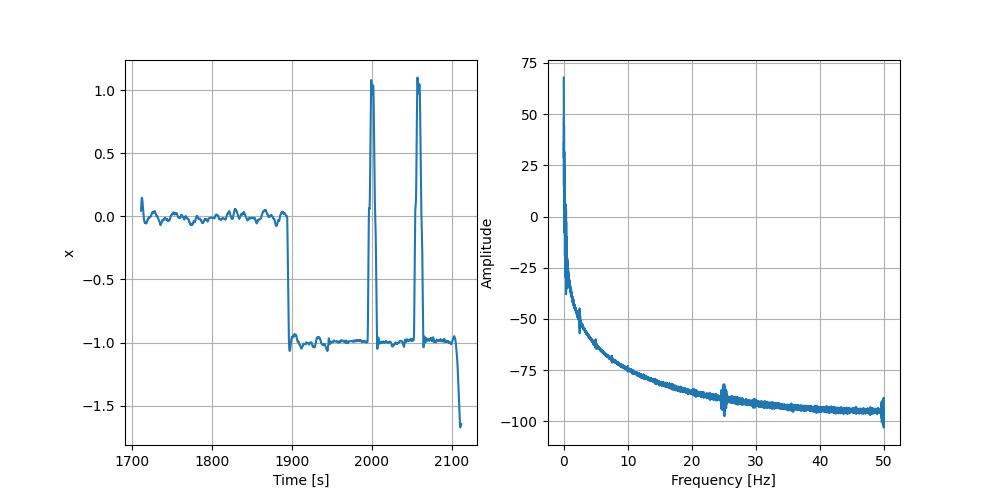

Frequency analysis of y


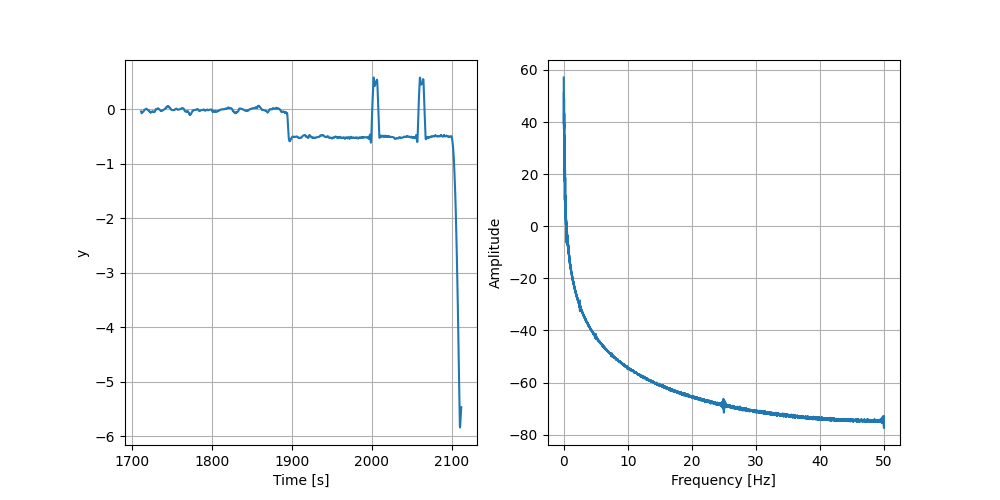

Frequency analysis of z


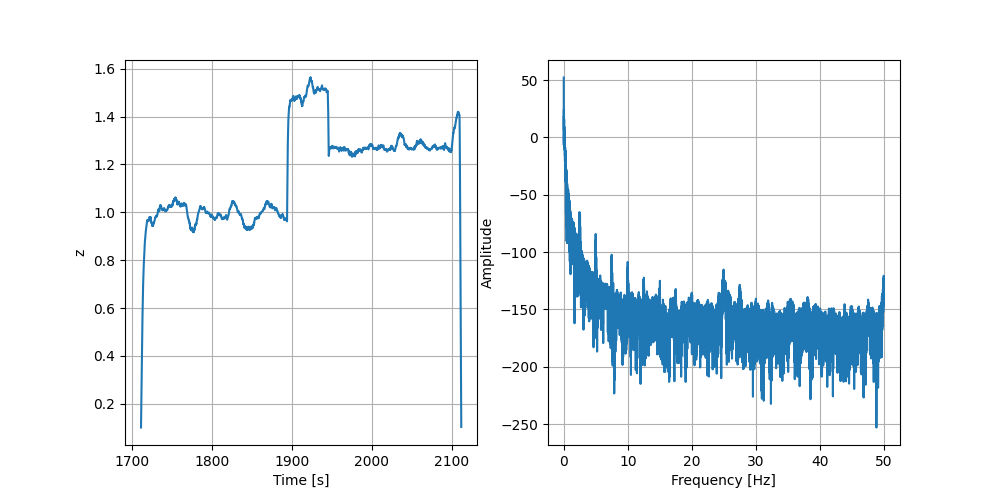

Frequency analysis of vx


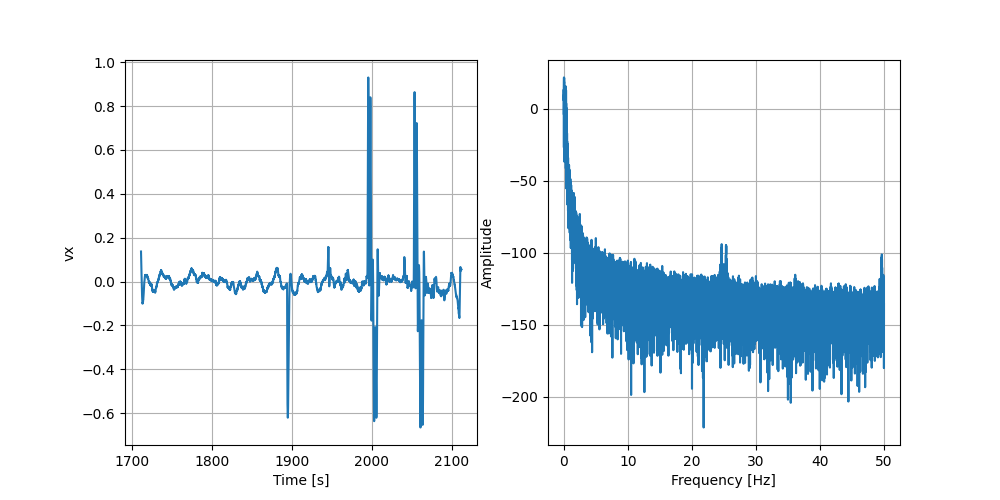

Frequency analysis of vy


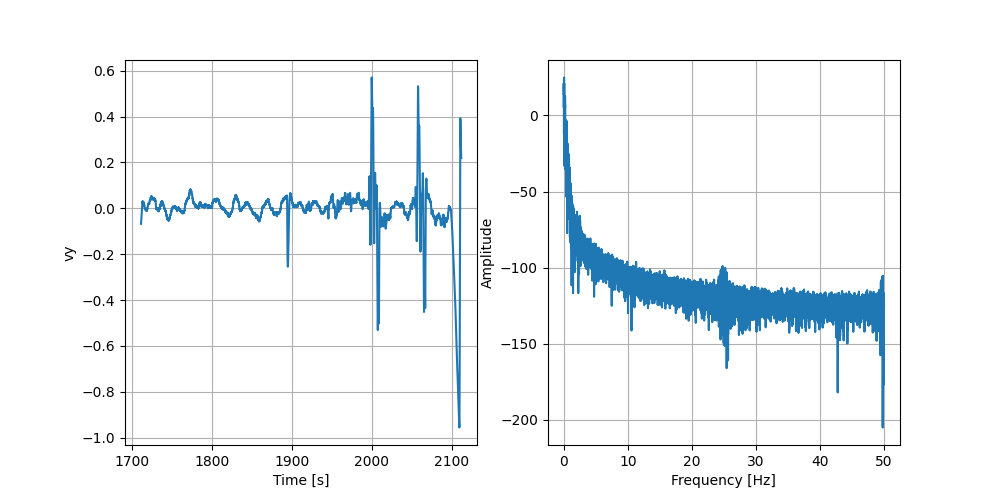

Frequency analysis of vz


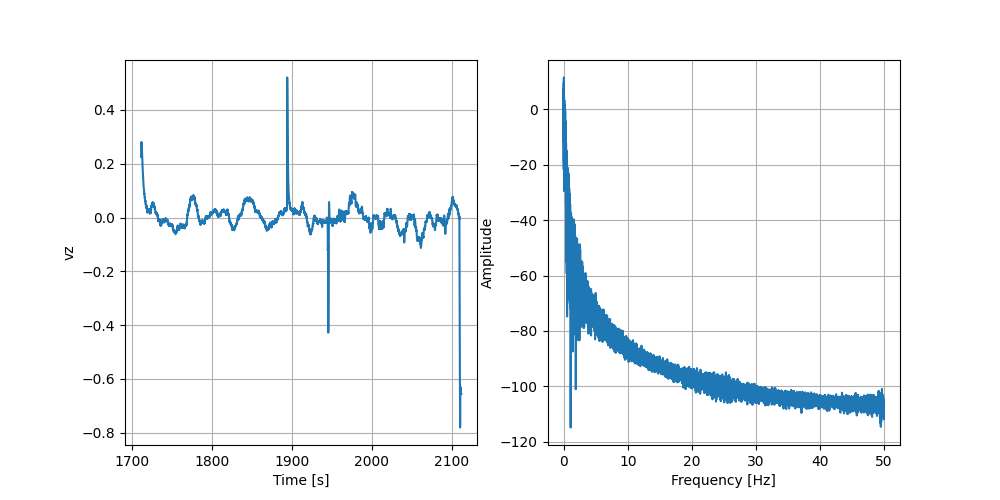

Frequency analysis of qw


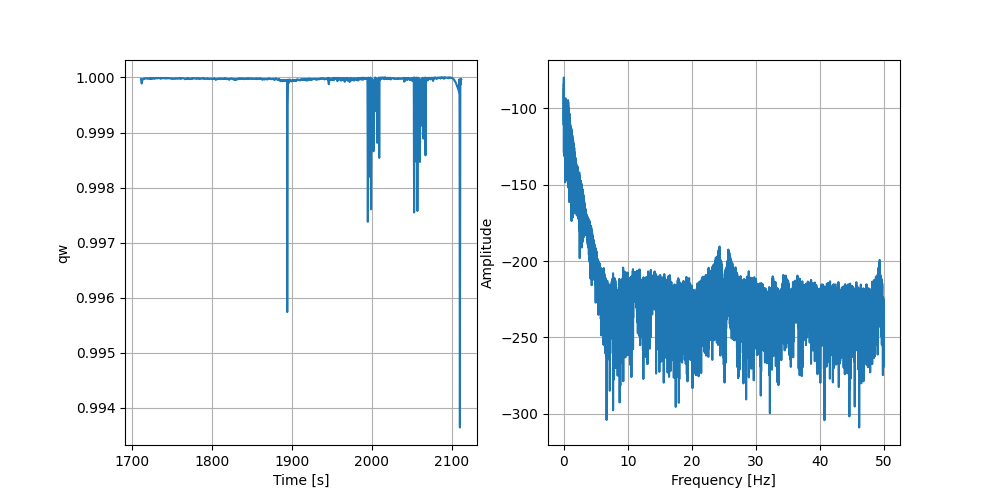

Frequency analysis of qx


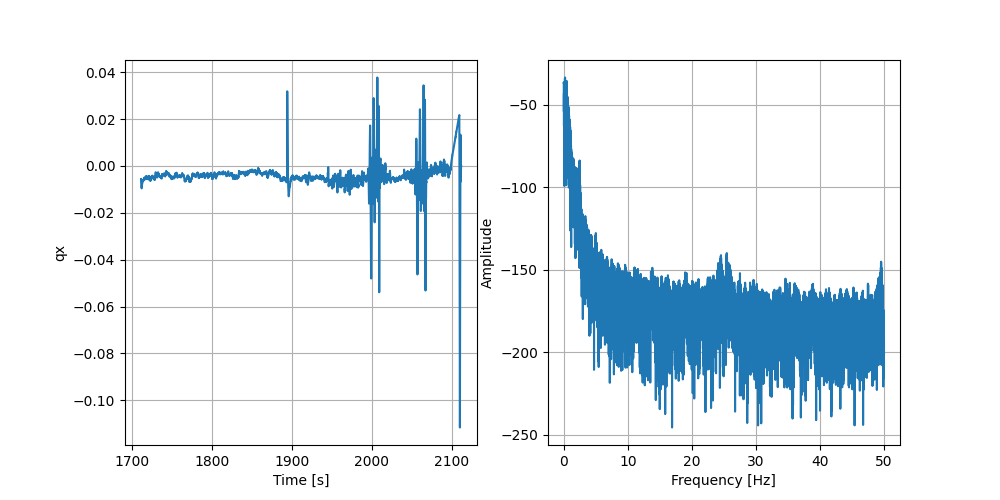

Frequency analysis of qy


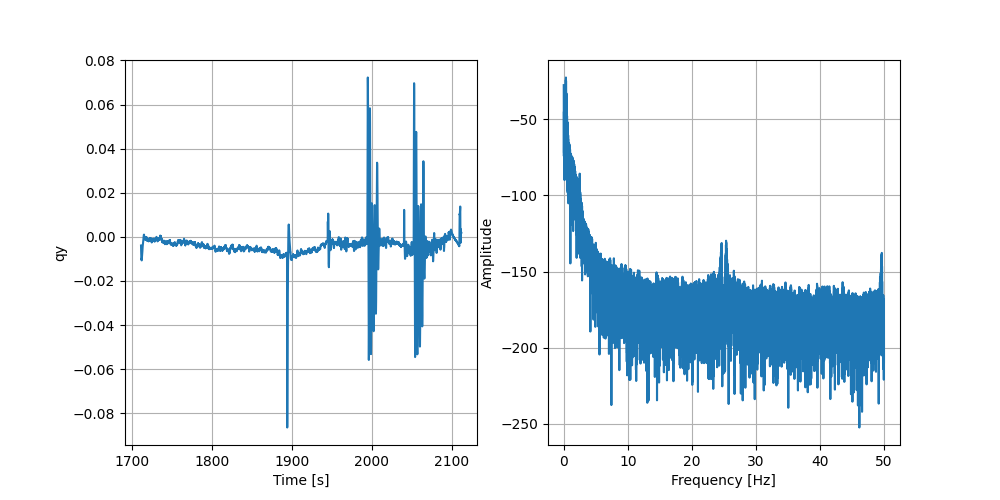

Frequency analysis of qz


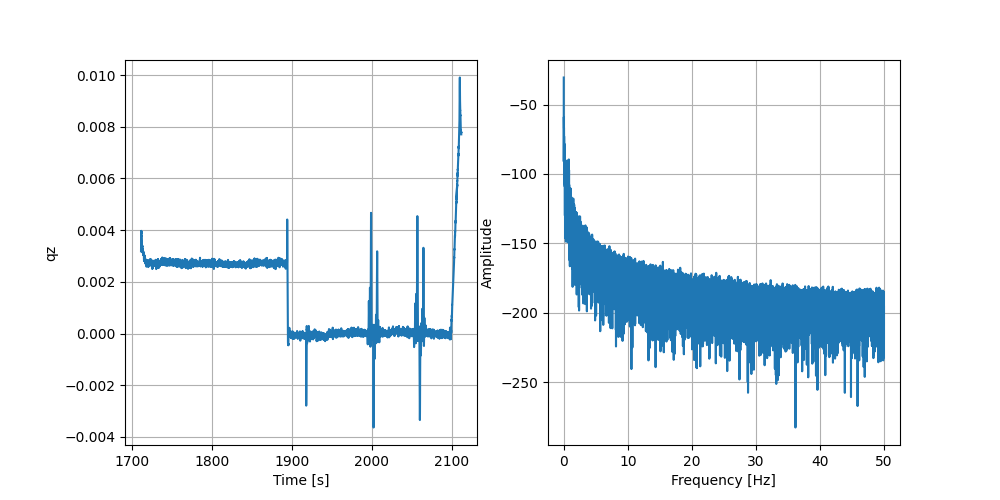

Frequency analysis of wx


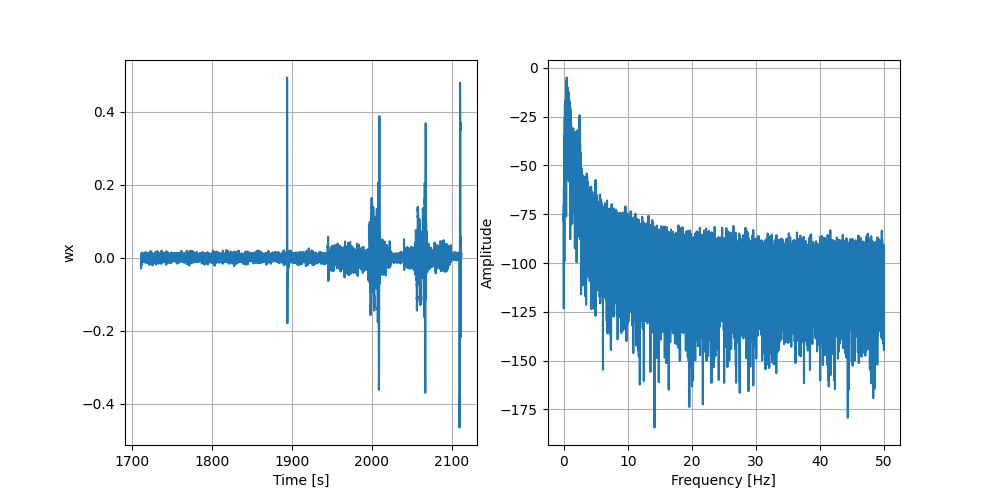

Frequency analysis of wy


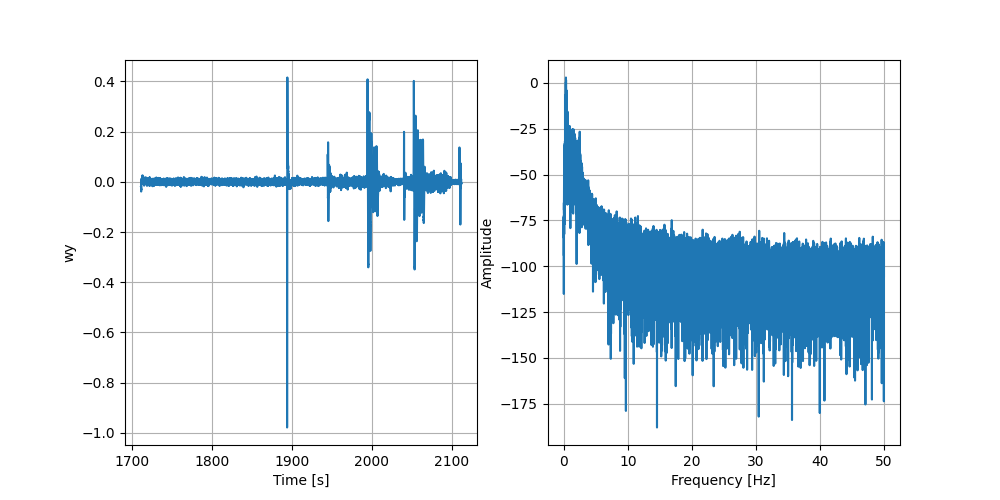

Frequency analysis of wz


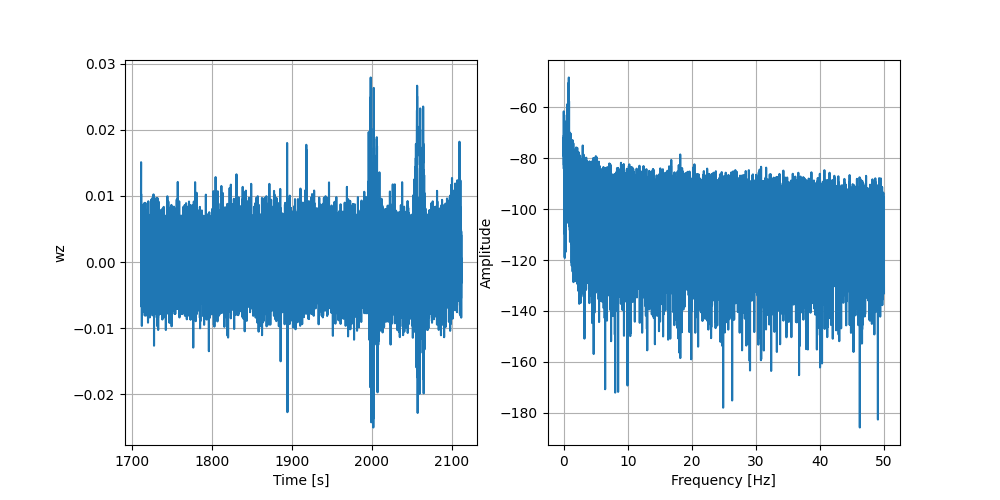

Frequency analysis of m1


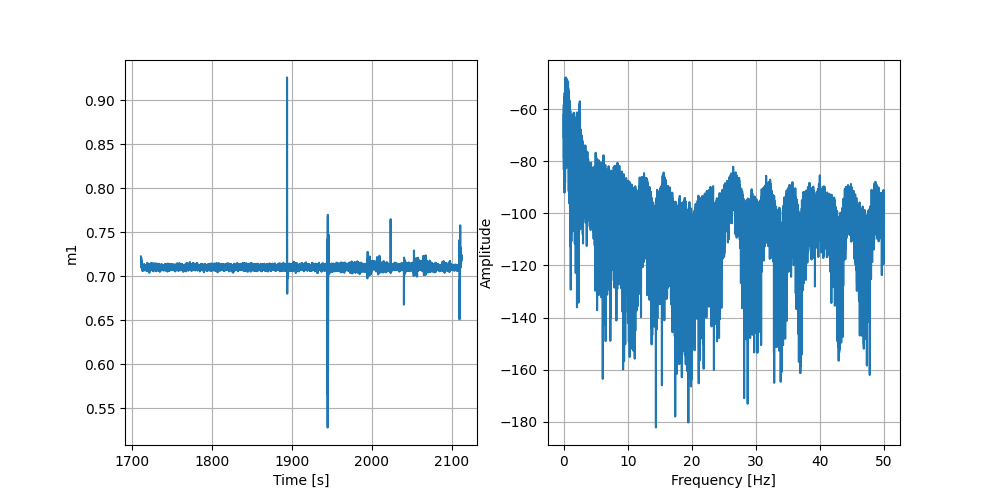

Frequency analysis of m2


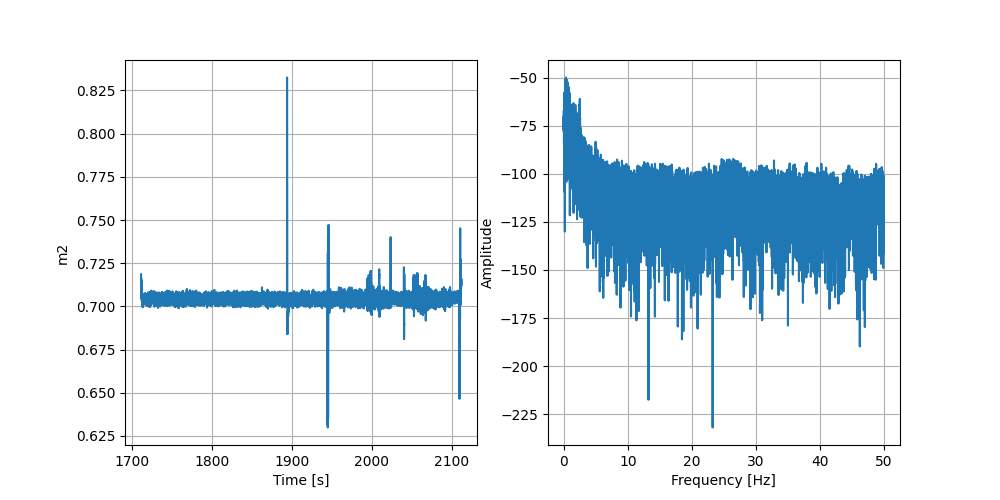

Frequency analysis of m3


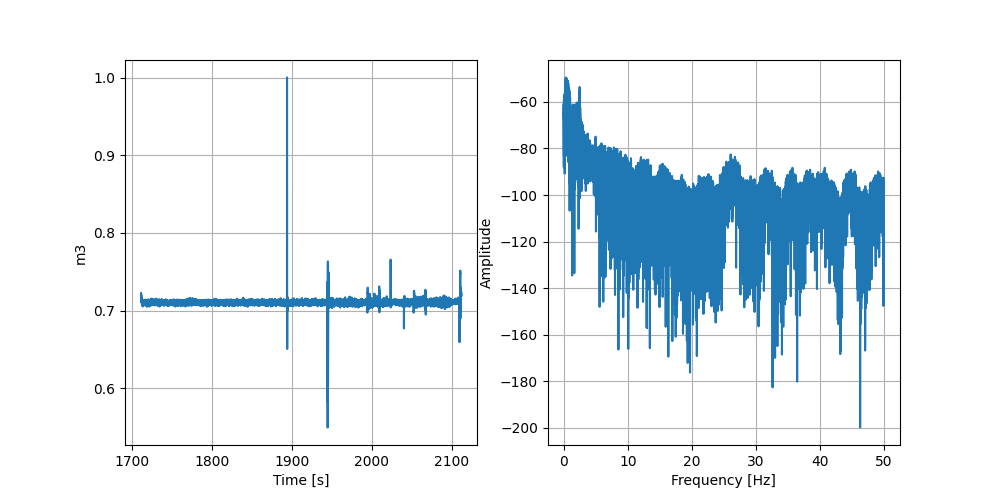

Frequency analysis of m4


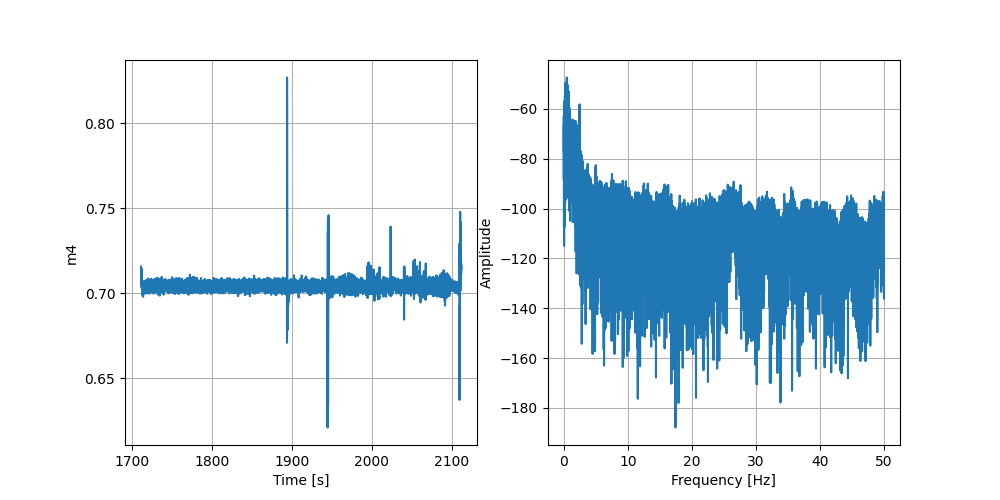

In [7]:
for key in log_data.keys():
    if key != 't':
        print(f'Frequency analysis of {key}')
        # Create a subplot with 1 row and 2 columns
        fig, ax = plt.subplots(1, 2, figsize=(10, 5))
        # Plot key and time from the log data
        ax[0].plot(log_data['t'], log_data[key])
        ax[0].set_xlabel('Time [s]')
        ax[0].set_ylabel(key)
        ax[0].grid()
        # Plot the frequency analysis of the key
        ax[1].plot(log_data_freq[key+'_fft_freq'], log_data_freq[key + '_fft'])
        ax[1].set_xlabel('Frequency [Hz]')
        ax[1].set_ylabel('Amplitude')
        ax[1].grid()
        plt.show()

In [8]:
# Define the cuttoff frequence based on the data
cutoff_freqs = {'x' : 2., 'y' : 2., 'z' : 2., 'vx' : 4.,
                'vy' : 4, 'vz' : 4, 'qw' : 6,
                'qx' : 6, 'qy' : 6, 'qz' : 6, 'wx' : 6,
                'wy' : 6, 'wz' : 6, 'm1' : 2, 'm2' : 2,
                'm3' : 2, 'm4' : 2,
}

In [9]:
log_data_dot = filter_data(log_data, cutoff_freqs, suffix_der='_dot', save_old_state=True,
            include_finite_diff = True, state_names=list(cutoff_freqs.keys()) )

  0%|          | 0/17 [00:00<?, ?it/s]

Smoothening of analysis of x


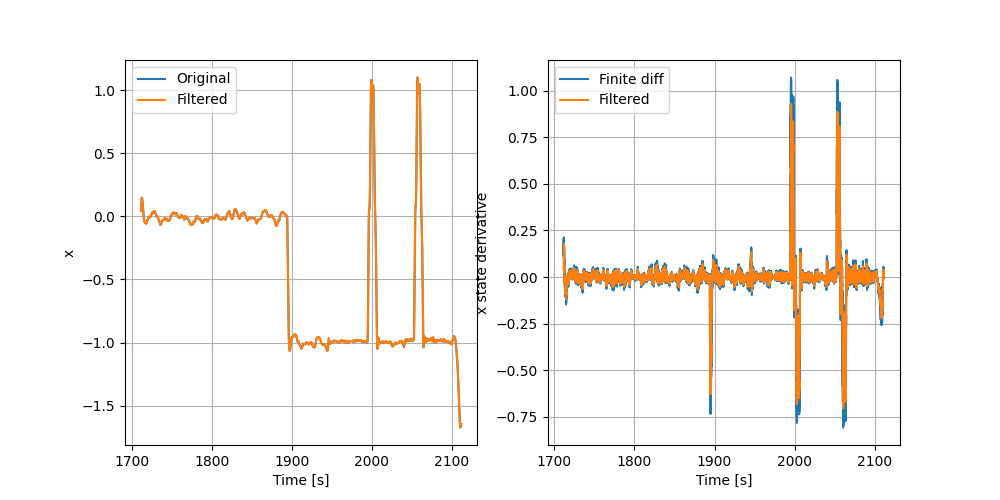

Smoothening of analysis of y


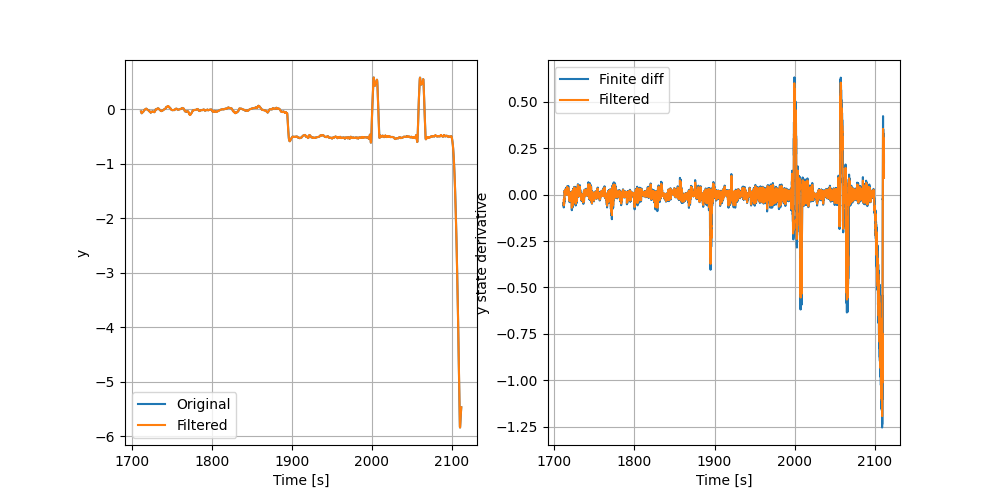

Smoothening of analysis of z


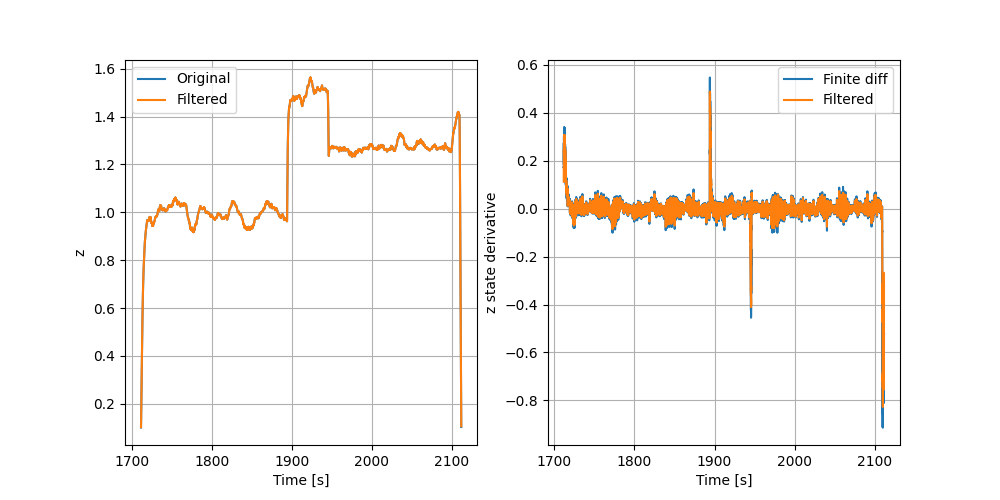

Smoothening of analysis of vx


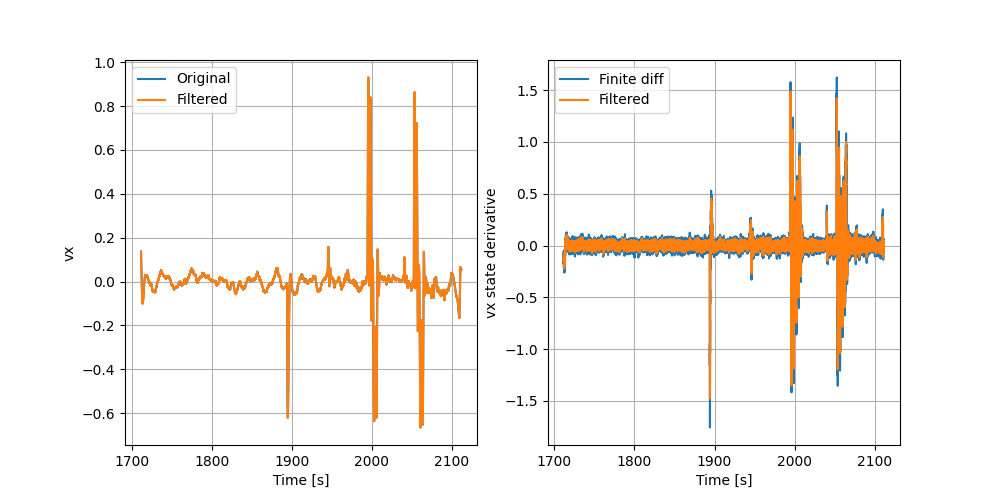

Smoothening of analysis of vy


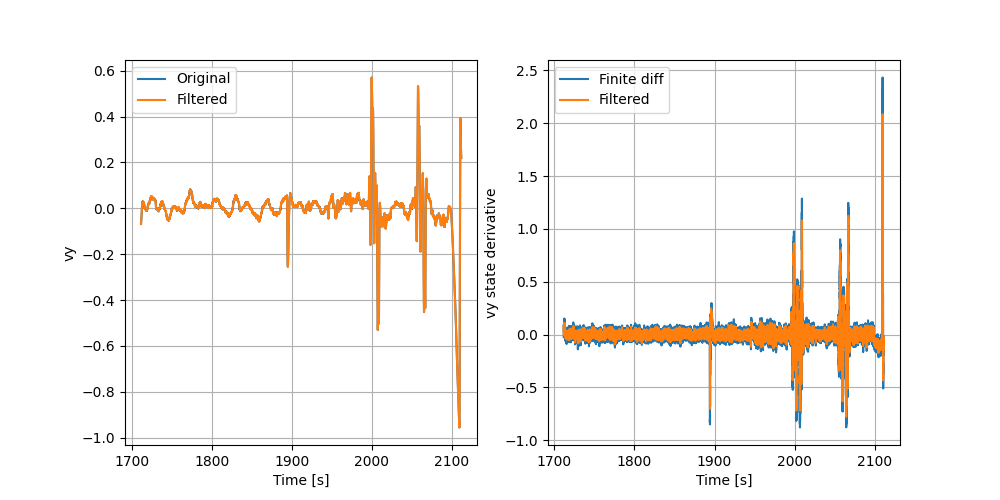

Smoothening of analysis of vz


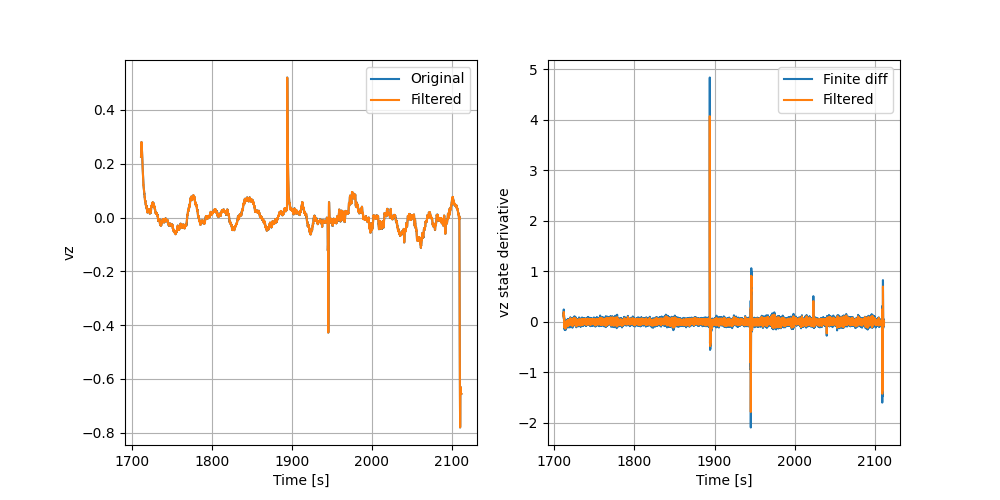

Smoothening of analysis of qw


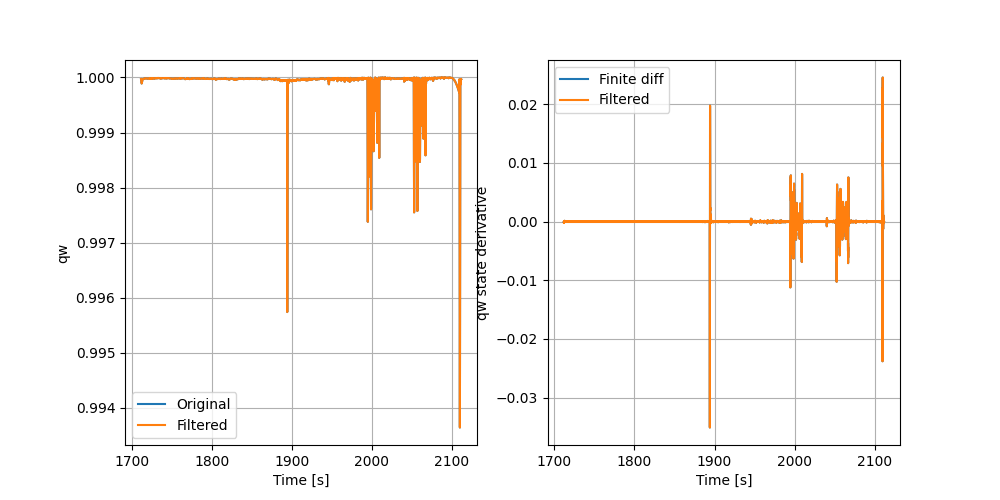

Smoothening of analysis of qx


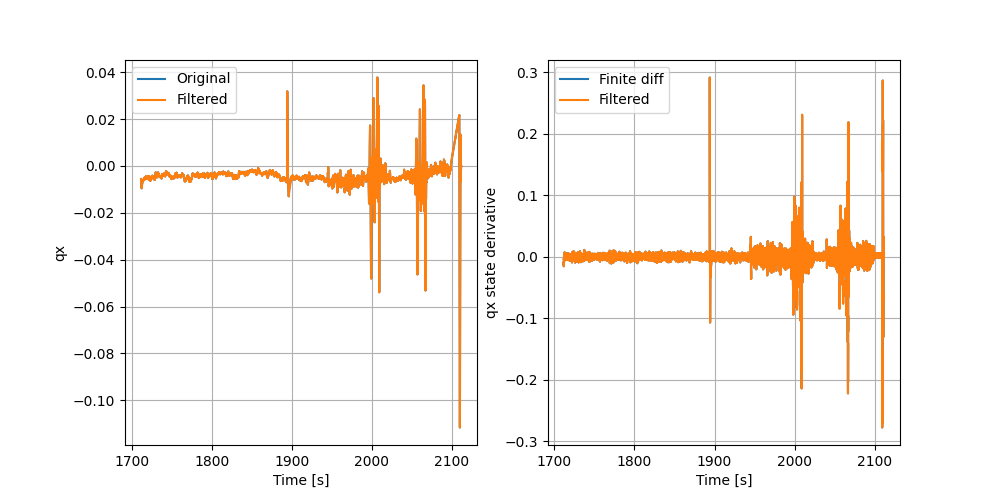

Smoothening of analysis of qy


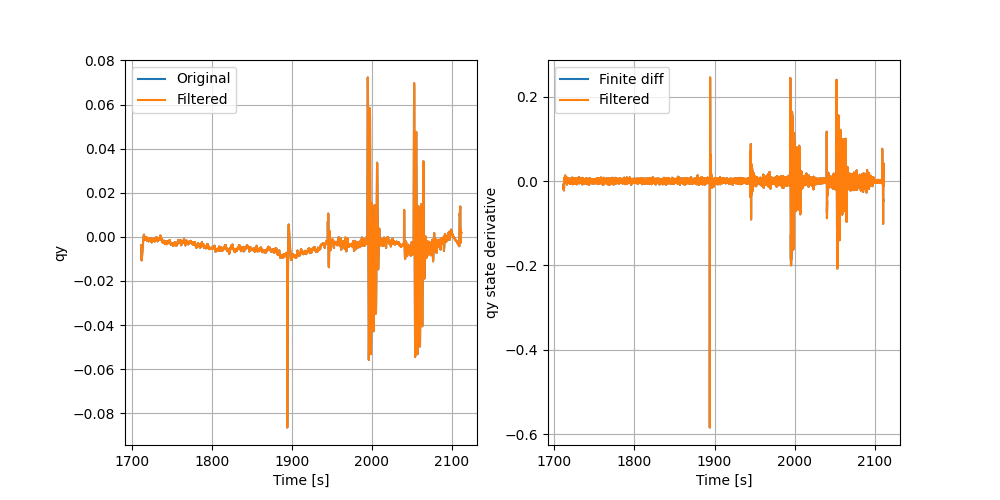

Smoothening of analysis of qz


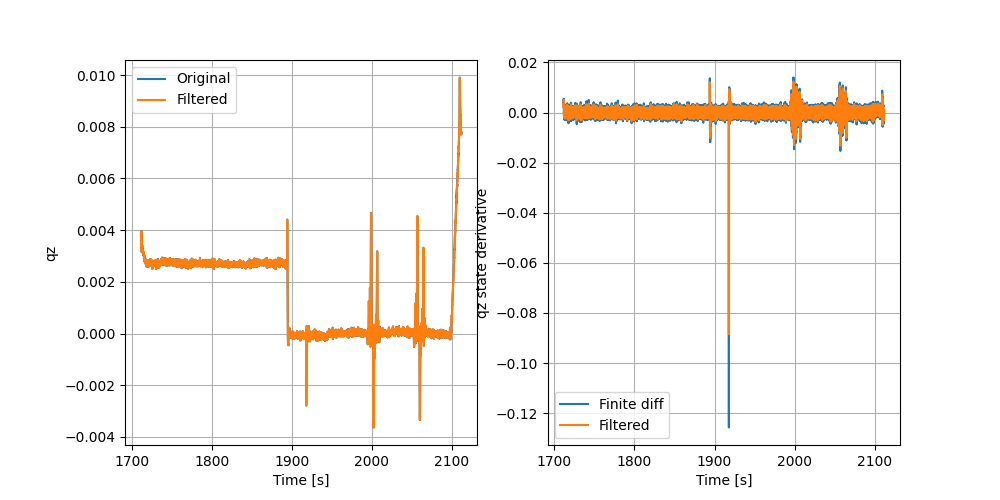

Smoothening of analysis of wx


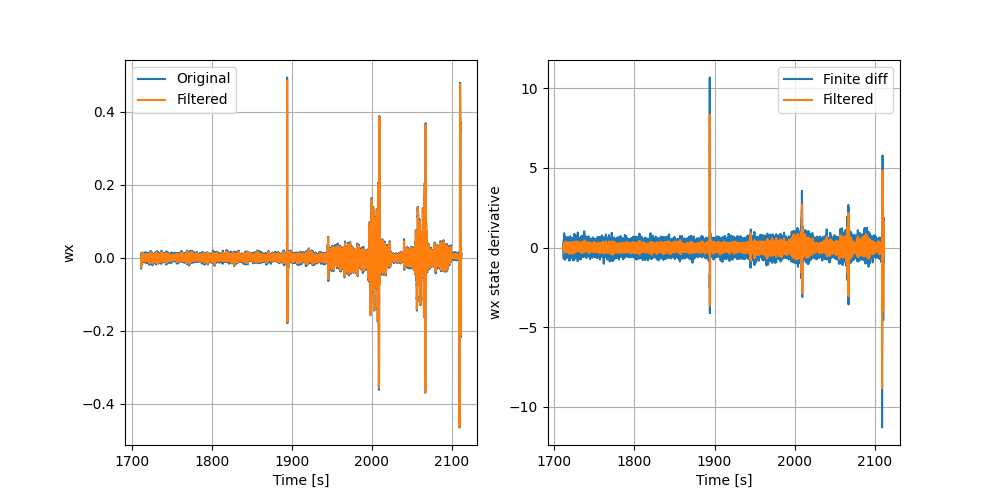

Smoothening of analysis of wy


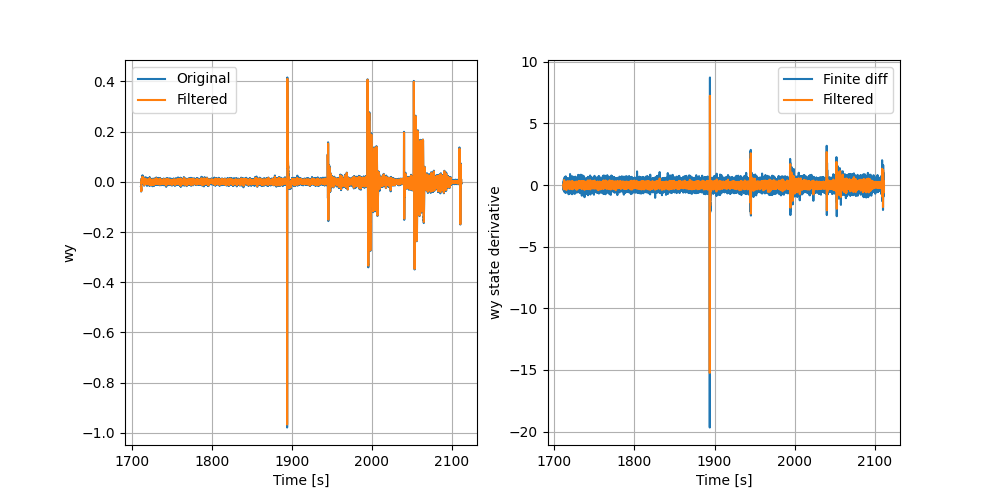

Smoothening of analysis of wz


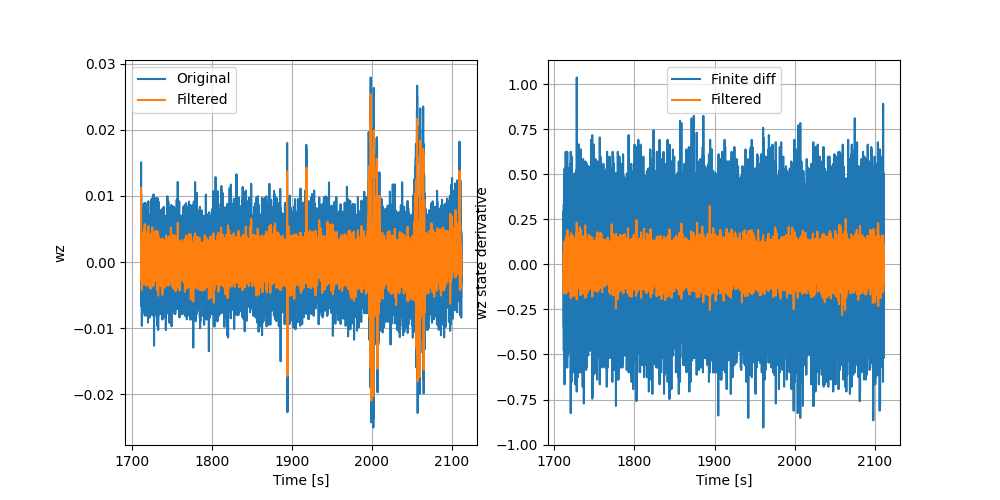

Smoothening of analysis of m1


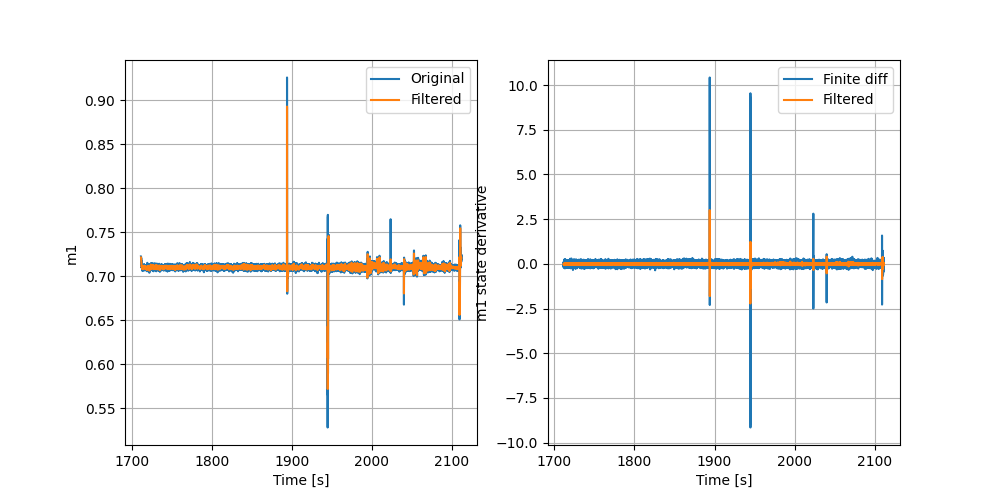

Smoothening of analysis of m2


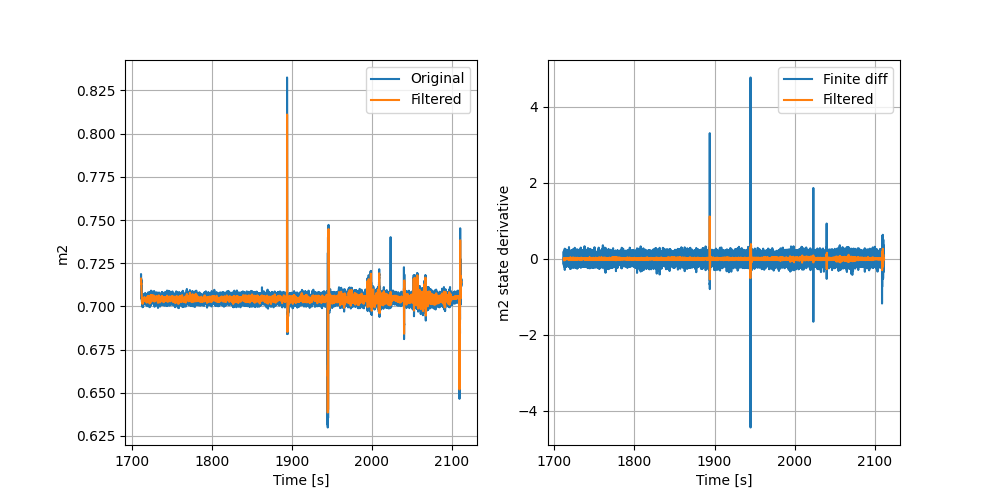

Smoothening of analysis of m3


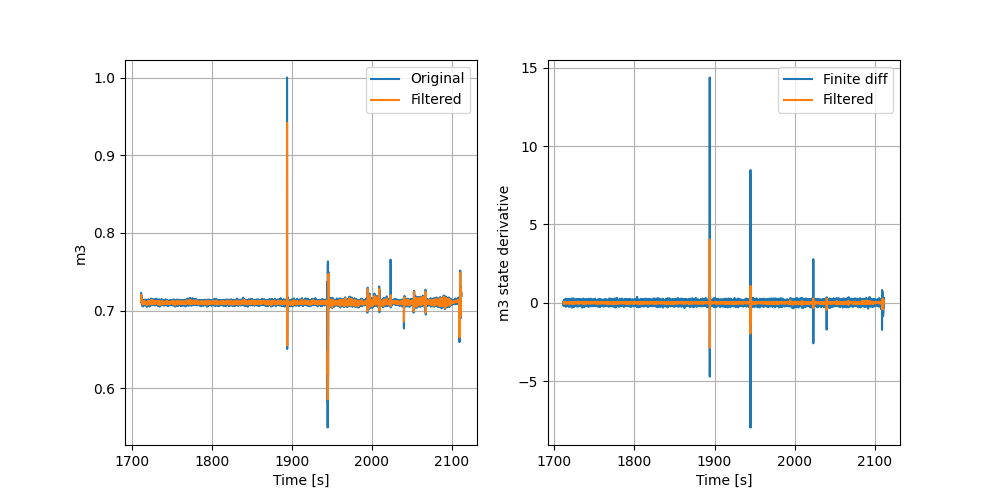

Smoothening of analysis of m4


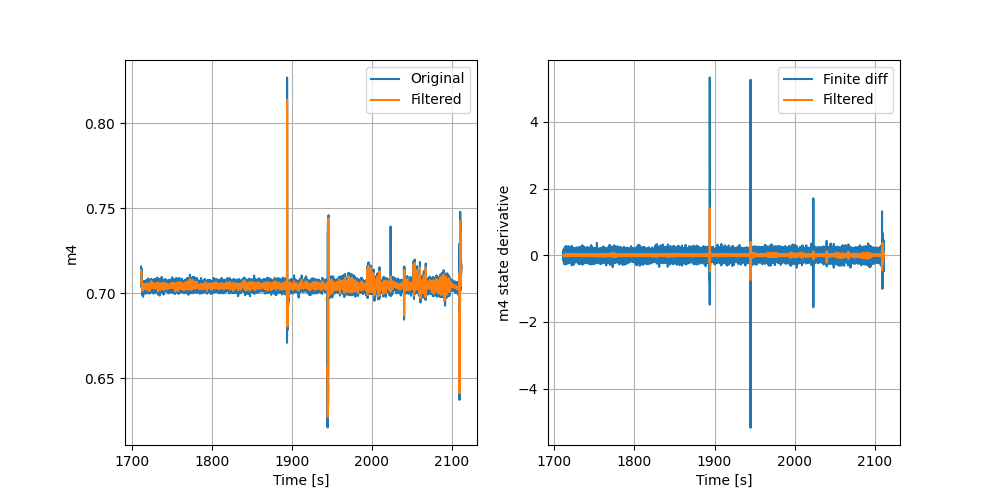

In [10]:
for key in log_data.keys():
    if key != 't':
        print(f'Smoothening of analysis of {key}')
        # Create a subplot with 1 row and 2 columns and share the x axis
        fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
        # Plot key and time from the log data
        ax[0].plot(log_data['t'], log_data[key], label='Original')
        ax[0].plot(log_data_dot['t'], log_data_dot[key], label='Filtered')
        ax[0].set_xlabel('Time [s]')
        ax[0].set_ylabel(key)
        ax[0].legend()
        ax[0].grid()
        # Plot the frequency analysis of the key
        ax[1].plot(log_data_dot['t'], log_data_dot[key+'_fd'], label='Finite diff')
        ax[1].plot(log_data_dot['t'], log_data_dot[key+'_dot'], label='Filtered')
        ax[1].set_xlabel('Time [s]')
        ax[1].set_ylabel(key +' state derivative')
        ax[1].legend()
        ax[1].grid()
        plt.show()